<a href="https://colab.research.google.com/github/vedantsawant/CSE512-ML-Project/blob/main/RockPaperScissors%20Architecture1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import zipfile  
from tensorflow.keras import regularizers

In [ ]:
!wget --no-check-certificate \
https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip

!wget --no-check-certificate \
https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip

--2022-11-28 08:59:47--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.215.128, 173.194.216.128, 173.194.217.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.215.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘rps.zip’

rps.zip             100%[===================>] 191.38M   108MB/s    in 1.8s    

2022-11-28 08:59:49 (108 MB/s) - ‘rps.zip’ saved [200682221/200682221]

--2022-11-28 08:59:49--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.215.128, 173.194.216.128, 173.194.217.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.215.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘rps-te

In [ ]:
zip_ref_train = zipfile.ZipFile('/content/rps.zip')
zip_ref_train.extractall()
zip_ref_train.close()

zip_ref_test = zipfile.ZipFile('/content/rps-test-set.zip')
zip_ref_test.extractall()
zip_ref_test.close()

In [ ]:
train_dir = '/content/rps'
test_dir = '/content/rps-test-set'

train_paper_dir = os.path.join(train_dir, 'paper')
train_rock_dir = os.path.join(train_dir, 'rock') 
train_scissors_dir = os.path.join(train_dir, 'scissors')

test_paper_dir = os.path.join(test_dir, 'paper')
test_rock_dir = os.path.join(test_dir, 'rock') 
test_scissors_dir = os.path.join(test_dir, 'scissors')

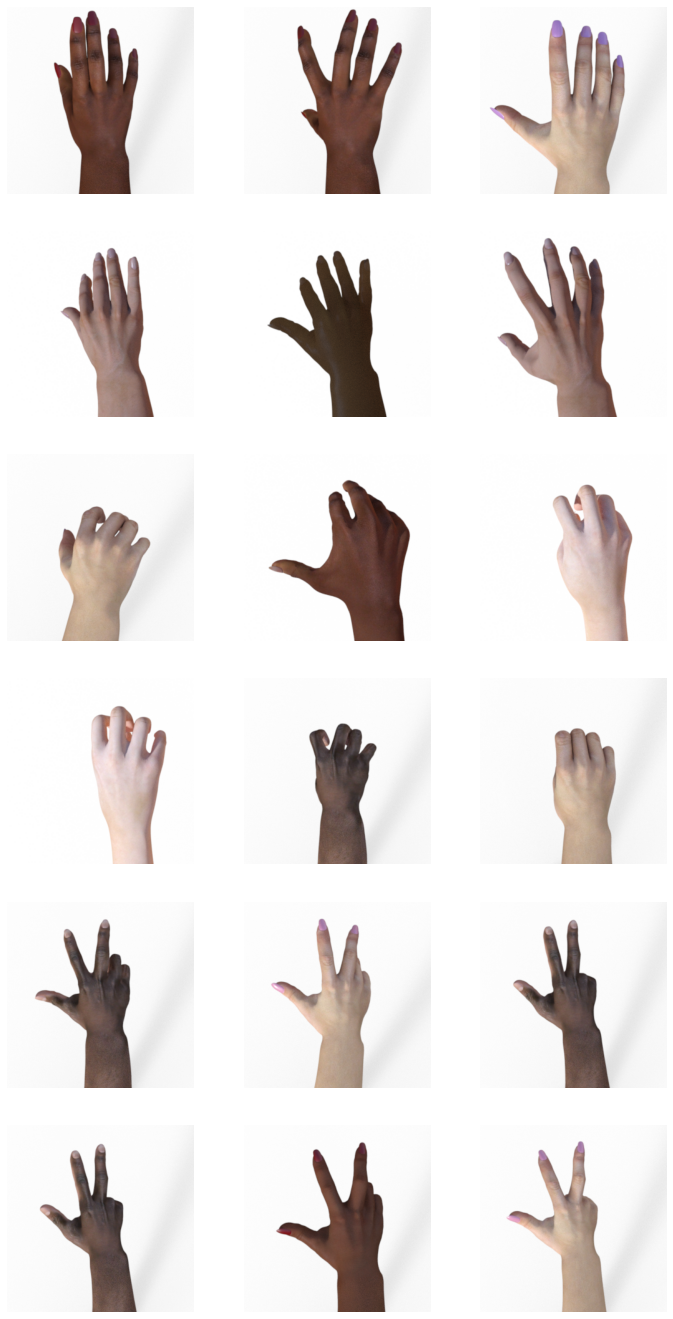

In [ ]:
ncols = 6
nrows = 3
index = 0

fig = plt.gcf()
fig.set_size_inches(nrows*4, ncols*4)

index += 6
next_paper_pix = [os.path.join(train_paper_dir, fname) for fname in os.listdir(train_paper_dir)[index-6 : index]]
next_rock_pix = [os.path.join(train_rock_dir, fname) for fname in os.listdir(train_rock_dir)[index-6 : index]]
next_scissors_pix = [os.path.join(train_scissors_dir, fname) for fname in os.listdir(train_scissors_dir)[index-6 : index]]

for i, img_path in enumerate(next_paper_pix+next_rock_pix+next_scissors_pix):
  sp = plt.subplot(ncols, nrows, i+1)
  sp.axis('off')
  img = mpimg.imread(img_path)
  plt.imshow(img)

In [ ]:
print(len(os.listdir(train_paper_dir))+len(os.listdir(train_rock_dir))+len(os.listdir(train_scissors_dir)))
print(len(os.listdir(test_paper_dir))+len(os.listdir(test_rock_dir))+len(os.listdir(test_scissors_dir)))

2520
372


### Base Model

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   width_shift_range = 0,
                                   height_shift_range = 0,
                                   rotation_range = 0,
                                   horizontal_flip = False,
                                   shear_range = 0,
                                   zoom_range = 0,
                                   fill_mode = 'nearest')
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 128,
                                                    target_size = (300, 300),
                                                    class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1/255.0)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size = 32,
                                                  target_size = (300, 300),
                                                  class_mode = 'categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (300, 300, 3)),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             
                             tf.keras.layers.Flatten(),
                            #  tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(512, activation = 'relu'),
                            #  tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(3, activation = 'softmax')])
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch = 8,
                    validation_data = test_generator,
                    validation_steps = 8,
                    epochs = 50,
                    verbose = 1)

Epoch 1/50
8/8 [==============================] - 16s 760ms/step - loss: 15.5140 - accuracy: 0.3467 - val_loss: 7.0533 - val_accuracy: 0.3438
Epoch 2/50
8/8 [==============================] - 7s 840ms/step - loss: 3.9310 - accuracy: 0.3750 - val_loss: 1.7986 - val_accuracy: 0.3398
Epoch 3/50
8/8 [==============================] - 6s 738ms/step - loss: 0.6997 - accuracy: 0.7139 - val_loss: 0.8421 - val_accuracy: 0.6797
Epoch 4/50
8/8 [==============================] - 6s 708ms/step - loss: 0.3295 - accuracy: 0.9136 - val_loss: 0.7651 - val_accuracy: 0.6133
Epoch 5/50
8/8 [==============================] - 6s 731ms/step - loss: 0.1754 - accuracy: 0.9697 - val_loss: 0.6507 - val_accuracy: 0.7461
Epoch 6/50
8/8 [==============================] - 6s 757ms/step - loss: 0.0789 - accuracy: 0.9888 - val_loss: 0.7245 - val_accuracy: 0.8008
Epoch 7/50
8/8 [==============================] - 6s 787ms/step - loss: 0.0356 - accuracy: 0.9951 - val_loss: 0.8135 - val_accuracy: 0.7500
Epoch 8/50
8/8 [==

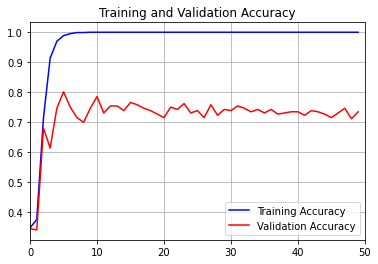

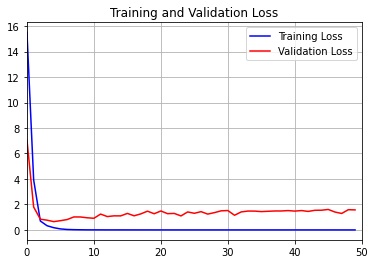

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label = 'Training Accuracy', color = 'blue')
plt.plot(epochs, val_acc, label = 'Validation Accuracy', color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label = 'Training Loss', color = 'blue')
plt.plot(epochs, val_loss, label = 'Validation Loss',color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Loss')
plt.legend()

### L1 Regularization

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   width_shift_range = 0,
                                   height_shift_range = 0,
                                   rotation_range = 0,
                                   horizontal_flip = False,
                                   shear_range = 0,
                                   zoom_range = 0,
                                   fill_mode = 'nearest')
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 128,
                                                    target_size = (300, 300),
                                                    class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1/255.0)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size = 32,
                                                  target_size = (300, 300),
                                                  class_mode = 'categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (300, 300, 3)),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu',kernel_regularizer=regularizers.l1(l=0.01)),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation = 'relu'),
                             tf.keras.layers.Dense(3, activation = 'softmax')])
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 149, 149, 16)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 170528)            0         
                                                                 
 dense_2 (Dense)             (None, 512)              

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch = 8,
                    validation_data = test_generator,
                    validation_steps = 8,
                    epochs = 50,
                    verbose = 1)

Epoch 1/50
8/8 [==============================] - 7s 766ms/step - loss: 40.6838 - accuracy: 0.3174 - val_loss: 11.1245 - val_accuracy: 0.3750
Epoch 2/50
8/8 [==============================] - 6s 722ms/step - loss: 6.3518 - accuracy: 0.4053 - val_loss: 3.8312 - val_accuracy: 0.3398
Epoch 3/50
8/8 [==============================] - 6s 699ms/step - loss: 3.1268 - accuracy: 0.7012 - val_loss: 3.3335 - val_accuracy: 0.4492
Epoch 4/50
8/8 [==============================] - 6s 720ms/step - loss: 2.8971 - accuracy: 0.8105 - val_loss: 3.2469 - val_accuracy: 0.6406
Epoch 5/50
8/8 [==============================] - 6s 703ms/step - loss: 2.4639 - accuracy: 0.9573 - val_loss: 3.4123 - val_accuracy: 0.4609
Epoch 6/50
8/8 [==============================] - 6s 725ms/step - loss: 2.3186 - accuracy: 0.9727 - val_loss: 2.7575 - val_accuracy: 0.7188
Epoch 7/50
8/8 [==============================] - 6s 717ms/step - loss: 2.1459 - accuracy: 0.9883 - val_loss: 3.0390 - val_accuracy: 0.7148
Epoch 8/50
8/8 [==

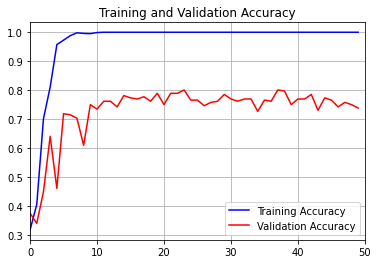

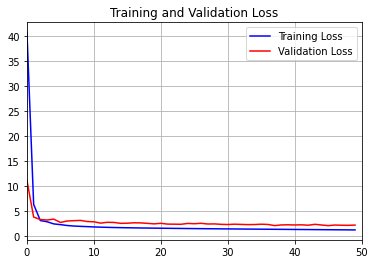

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label = 'Training Accuracy', color = 'blue')
plt.plot(epochs, val_acc, label = 'Validation Accuracy', color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label = 'Training Loss', color = 'blue')
plt.plot(epochs, val_loss, label = 'Validation Loss',color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Loss')
plt.legend()

In [ ]:
train_generator.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

### L2 Regularization

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   width_shift_range = 0,
                                   height_shift_range = 0,
                                   rotation_range = 0,
                                   horizontal_flip = False,
                                   shear_range = 0,
                                   zoom_range = 0,
                                   fill_mode = 'nearest')
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 128,
                                                    target_size = (300, 300),
                                                    class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1/255.0)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size = 32,
                                                  target_size = (300, 300),
                                                  class_mode = 'categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (300, 300, 3)),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu',kernel_regularizer=regularizers.l2(l=0.01)),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation = 'relu'),
                             tf.keras.layers.Dense(3, activation = 'softmax')])
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch = 8,
                    validation_data = test_generator,
                    validation_steps = 8,
                    epochs = 50,
                    verbose = 1)

Epoch 1/50
8/8 [==============================] - 6s 734ms/step - loss: 10.4185 - accuracy: 0.3730 - val_loss: 3.0288 - val_accuracy: 0.3398
Epoch 2/50
8/8 [==============================] - 6s 716ms/step - loss: 1.0388 - accuracy: 0.6941 - val_loss: 0.9095 - val_accuracy: 0.7188
Epoch 3/50
8/8 [==============================] - 6s 685ms/step - loss: 0.4293 - accuracy: 0.9319 - val_loss: 0.6621 - val_accuracy: 0.7891
Epoch 4/50
8/8 [==============================] - 6s 711ms/step - loss: 0.2549 - accuracy: 0.9844 - val_loss: 0.7516 - val_accuracy: 0.7773
Epoch 5/50
8/8 [==============================] - 6s 711ms/step - loss: 0.1856 - accuracy: 0.9922 - val_loss: 0.6881 - val_accuracy: 0.7969
Epoch 6/50
8/8 [==============================] - 6s 713ms/step - loss: 0.1507 - accuracy: 0.9990 - val_loss: 0.9435 - val_accuracy: 0.7148
Epoch 7/50
8/8 [==============================] - 6s 686ms/step - loss: 0.1431 - accuracy: 0.9970 - val_loss: 1.0338 - val_accuracy: 0.7266
Epoch 8/50
8/8 [===

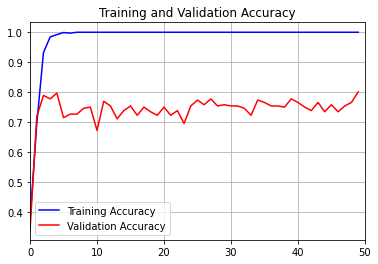

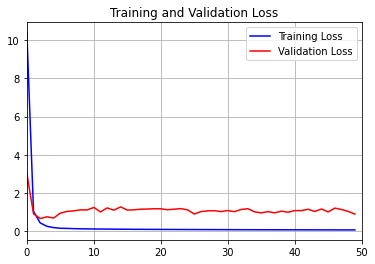

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label = 'Training Accuracy', color = 'blue')
plt.plot(epochs, val_acc, label = 'Validation Accuracy', color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label = 'Training Loss', color = 'blue')
plt.plot(epochs, val_loss, label = 'Validation Loss',color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Loss')
plt.legend()

### Augmentation

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   rotation_range = 40,
                                   horizontal_flip = True,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   fill_mode = 'nearest')
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 128,
                                                    target_size = (300, 300),
                                                    class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1/255.0)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size = 32,
                                                  target_size = (300, 300),
                                                  class_mode = 'categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (300, 300, 3)),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation = 'relu'),
                             tf.keras.layers.Dense(3, activation = 'softmax')])
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch = 8,
                    validation_data = test_generator,
                    validation_steps = 8,
                    epochs = 50,
                    verbose = 1)

Epoch 1/50
8/8 [==============================] - 23s 3s/step - loss: 17.9289 - accuracy: 0.3359 - val_loss: 4.4991 - val_accuracy: 0.3086
Epoch 2/50
8/8 [==============================] - 21s 3s/step - loss: 1.8948 - accuracy: 0.3343 - val_loss: 1.1054 - val_accuracy: 0.4102
Epoch 3/50
8/8 [==============================] - 23s 3s/step - loss: 1.1003 - accuracy: 0.3643 - val_loss: 1.0582 - val_accuracy: 0.4883
Epoch 4/50
8/8 [==============================] - 22s 3s/step - loss: 1.0611 - accuracy: 0.4131 - val_loss: 1.0188 - val_accuracy: 0.4805
Epoch 5/50
8/8 [==============================] - 23s 3s/step - loss: 1.0555 - accuracy: 0.4434 - val_loss: 0.9480 - val_accuracy: 0.4492
Epoch 6/50
8/8 [==============================] - 21s 3s/step - loss: 0.9706 - accuracy: 0.4898 - val_loss: 0.9291 - val_accuracy: 0.6562
Epoch 7/50
8/8 [==============================] - 21s 3s/step - loss: 0.9258 - accuracy: 0.5610 - val_loss: 0.9220 - val_accuracy: 0.6641
Epoch 8/50
8/8 [=================

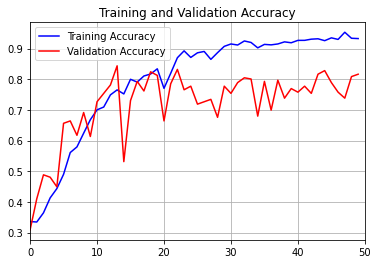

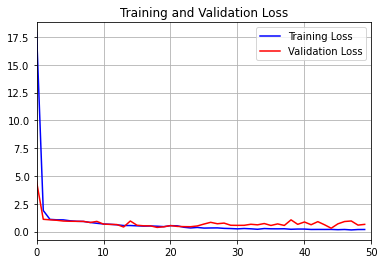

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label = 'Training Accuracy', color = 'blue')
plt.plot(epochs, val_acc, label = 'Validation Accuracy', color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label = 'Training Loss', color = 'blue')
plt.plot(epochs, val_loss, label = 'Validation Loss',color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Loss')
plt.legend()

### Dropout

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   width_shift_range = 0,
                                   height_shift_range = 0,
                                   rotation_range = 0,
                                   horizontal_flip = False,
                                   shear_range = 0,
                                   zoom_range = 0,
                                   fill_mode = 'nearest')
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 128,
                                                    target_size = (300, 300),
                                                    class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1/255.0)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size = 32,
                                                  target_size = (300, 300),
                                                  class_mode = 'categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (300, 300, 3)),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(512, activation = 'relu'),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(3, activation = 'softmax')])
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch = 8,
                    validation_data = test_generator,
                    validation_steps = 8,
                    epochs = 50,
                    verbose = 1)

Epoch 1/50
8/8 [==============================] - 6s 746ms/step - loss: 10.9218 - accuracy: 0.3587 - val_loss: 1.4167 - val_accuracy: 0.3477
Epoch 2/50
8/8 [==============================] - 6s 718ms/step - loss: 1.1460 - accuracy: 0.5322 - val_loss: 1.0754 - val_accuracy: 0.3711
Epoch 3/50
8/8 [==============================] - 6s 684ms/step - loss: 0.4764 - accuracy: 0.8303 - val_loss: 0.9312 - val_accuracy: 0.5938
Epoch 4/50
8/8 [==============================] - 6s 705ms/step - loss: 0.2336 - accuracy: 0.9141 - val_loss: 1.1046 - val_accuracy: 0.4531
Epoch 5/50
8/8 [==============================] - 6s 711ms/step - loss: 0.0834 - accuracy: 0.9873 - val_loss: 0.7749 - val_accuracy: 0.7383
Epoch 6/50
8/8 [==============================] - 6s 711ms/step - loss: 0.0307 - accuracy: 0.9951 - val_loss: 1.0403 - val_accuracy: 0.7148
Epoch 7/50
8/8 [==============================] - 6s 687ms/step - loss: 0.0149 - accuracy: 0.9970 - val_loss: 1.1333 - val_accuracy: 0.6875
Epoch 8/50
8/8 [===

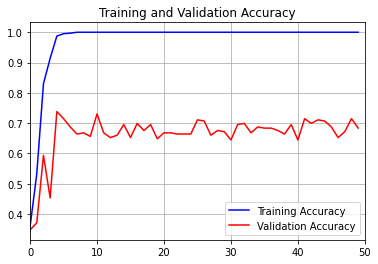

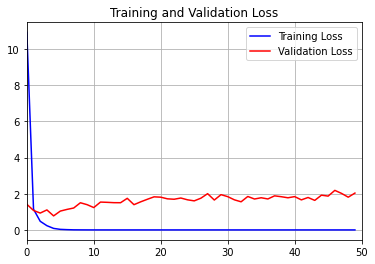

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label = 'Training Accuracy', color = 'blue')
plt.plot(epochs, val_acc, label = 'Validation Accuracy', color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label = 'Training Loss', color = 'blue')
plt.plot(epochs, val_loss, label = 'Validation Loss',color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Loss')
plt.legend()

###DropConnect

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   width_shift_range = 0,
                                   height_shift_range = 0,
                                   rotation_range = 0,
                                   horizontal_flip = False,
                                   shear_range = 0,
                                   zoom_range = 0,
                                   fill_mode = 'nearest')
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 128,
                                                    target_size = (300, 300),
                                                    class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1/255.0)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size = 32,
                                                  target_size = (300, 300),
                                                  class_mode = 'categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
pip install dropconnect-tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for dropconnect-tensorflow: filename=dropconnect_tensorflow-0.1.1-py3-none-any.whl size=4659 sha256=3d1ad514d03458edb0977981ab93ee4ec6b12bd3a7b86c2199c840b241ec1816
  Stored in directory: /root/.cache/pip/wheels/b3/01/96/2463fe99c7de6dcdd3b28e6ecdafa4081709eb38b1a446d4dd
Successfully built dropconnect-tensorflow


In [ ]:
from dropconnect_tensorflow import DropConnectDense

model = tf.keras.Sequential([tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (300, 300, 3)),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation = 'relu'),
                             DropConnectDense(units=64, prob=0.2, activation="relu", use_bias=True),
                             tf.keras.layers.Dense(3, activation = 'softmax')])
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 149, 149, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 73, 73, 32)       0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 170528)            0         
                                                                 
 dense_10 (Dense)            (None, 512)              

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch = 8,
                    validation_data = test_generator,
                    validation_steps = 8,
                    epochs = 50,
                    verbose = 1)

Epoch 1/50
8/8 [==============================] - 10s 1s/step - loss: 8.5622 - accuracy: 0.3567 - val_loss: 4.9971 - val_accuracy: 0.3398
Epoch 2/50
8/8 [==============================] - 7s 878ms/step - loss: 1.6708 - accuracy: 0.5371 - val_loss: 1.0258 - val_accuracy: 0.4375
Epoch 3/50
8/8 [==============================] - 6s 700ms/step - loss: 0.5063 - accuracy: 0.8799 - val_loss: 0.9761 - val_accuracy: 0.5781
Epoch 4/50
8/8 [==============================] - 5s 687ms/step - loss: 0.3066 - accuracy: 0.8984 - val_loss: 0.8548 - val_accuracy: 0.5469
Epoch 5/50
8/8 [==============================] - 6s 720ms/step - loss: 0.1045 - accuracy: 0.9888 - val_loss: 0.5958 - val_accuracy: 0.8242
Epoch 6/50
8/8 [==============================] - 6s 705ms/step - loss: 0.0381 - accuracy: 0.9941 - val_loss: 0.5486 - val_accuracy: 0.8164
Epoch 7/50
8/8 [==============================] - 6s 708ms/step - loss: 0.0155 - accuracy: 0.9961 - val_loss: 0.8702 - val_accuracy: 0.7383
Epoch 8/50
8/8 [======

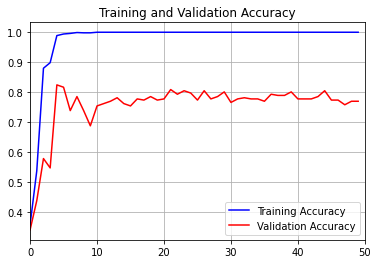

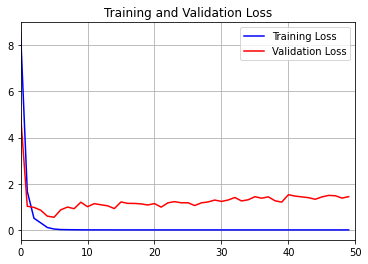

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label = 'Training Accuracy', color = 'blue')
plt.plot(epochs, val_acc, label = 'Validation Accuracy', color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label = 'Training Loss', color = 'blue')
plt.plot(epochs, val_loss, label = 'Validation Loss',color = 'red')
plt.xlim([0,50])
plt.grid('on')
plt.title('Training and Validation Loss')
plt.legend()